### Import Libraries

In [1]:
import pandas as pd
import numpy as np

### Import data

In [2]:
dataset = pd.read_csv('diabetes.csv')

In [29]:
#dataset.info()

In [30]:
#dataset.head()

In [3]:
#..............Assigning X and Y variables...........#
x = dataset.drop(['Outcome'], axis=1)
y = np.array(dataset['Outcome']).reshape(-1,1)  #Acidic/Basic

In [4]:
#.............Split train and test sets..............#
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=25)

In [5]:
#...............Feature scaling..................#
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

<Axes: xlabel='Outcome', ylabel='count'>

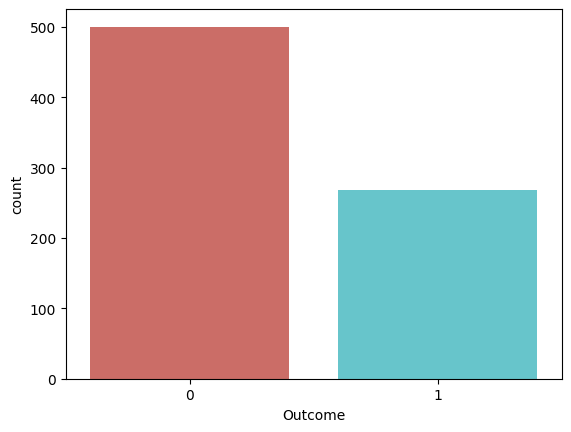

In [6]:
import seaborn as sns
%matplotlib inline

sns.countplot(x='Outcome', data=dataset, palette='hls')

In [7]:
dataset.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [35]:
#dataset.isnull().sum()

In [36]:
#sns.boxplot(x='Outcome', y='Glucose', data=dataset, palette='hls')

In [37]:
#sns.heatmap(dataset.corr())

### Run all algorithms

In [8]:
def y_pred(x_train, x_test, y_train, y_test):
    from classmodels import classifiers
    # Create an instance of MyClass
    my_instance = classifiers(x_train, x_test, y_train, y_test)
    scoreind = ['Accuracy', 'Sensitivity', 'Specificity', 'AUC', 'PPV', 'NPV', 'PLR', 'NLR']
    # List of method names you want to call
    methods_to_call = ['logreg', 'dt']
    #methods_to_call = ['lr', 'lasso','rf']

    tempY = []
    tempS = []
    # Use a loop to call the methods
    for method_name in methods_to_call:
        # Use getattr to get the method by name and then call it
        method = getattr(my_instance, method_name)
        y_pred = method(x_train, x_test, y_train, y_test)[0]
        scores = method(x_train, x_test, y_train, y_test)[1]
        tempY.append(y_pred.reshape(-1, 1))
        tempS.append(scores.reshape(-1, 1))

    tempY = np.hstack(tempY)  # Stack the column vectors horizontally
    predAll = pd.DataFrame(data=tempY, columns=methods_to_call)
    tempS = np.hstack(tempS)  # Stack the column vectors horizontally
    scoresAll = pd.DataFrame(data=tempS, columns=methods_to_call, index=scoreind)
    #temp = np.concatenate((y_test,temp),1)
    return(predAll,scoresAll)

In [9]:
PredAll = y_pred(x_train, x_test, y_train, y_test)[0]
ScoreAll = y_pred(x_train, x_test, y_train, y_test)[1]

c:\Users\neelesh\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\neelesh\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\neelesh\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\neelesh\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1184: D

In [10]:
PredAll

,logreg,dt
0,1,0
1,1,0
2,0,0
3,1,1
4,0,0
...,...,...
226,0,0
227,0,0
228,1,1
229,0,0


In [11]:
ScoreAll

,logreg,dt
Accuracy,0.796537,0.696970
Sensitivity,0.846626,0.788462
Specificity,0.676471,0.506667
AUC,0.811620,0.651981
PPV,0.862500,0.768750
NPV,0.647887,0.535211
PLR,2.616843,1.598233
NLR,0.226727,0.417510


#### Rough to check

In [9]:
from classmodels import classifiers
from sklearn.metrics import confusion_matrix
my_instance2 = classifiers(x_train, x_test, y_train, y_test)
y_pred = my_instance2.logreg(x_train, x_test, y_train, y_test)
# cm = confusion_matrix(y_test,y_pred)
# cm

c:\Users\neelesh\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ValueError: too many values to unpack (expected 2)

In [8]:
y_pred

(array([1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
        0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
        0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1,
        1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
        0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
        0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0], dtype=int64),
 array([0.7965368 , 0.84662577, 0.67647059, 0.8625    , 0.64788732,
        2.61684328, 0.22672713]),
 array([[138,  22],
        [ 25,  46]], dtype=int64))

In [13]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)
classifier.fit(x_train,y_train)

#.......Predict the Test set result.......#
y_pred = classifier.predict(x_test)
y_pred_quant = classifier.predict_proba(x_test)[:, 1] #Only keep the first column, which is the 'pos' values

c:\Users\neelesh\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [11]:
 #..........Area Under the curve (AUC)...............#
from sklearn.metrics import auc, roc_auc_score
AUC = roc_auc_score(y_test,y_pred_quant)
#AUC = auc(fpr, tpr)
AUC


0.811619718309859

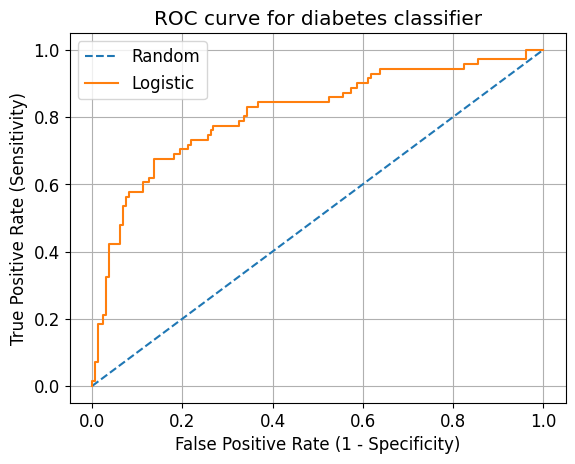

In [37]:
from sklearn.metrics import auc, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
#fpr, tpr, thresholds = roc_curve(y_test, y_pred_quant)

# calculate AUC
AUC = roc_auc_score(y_test, y_pred_quant)
# print('AUC: %.3f' % auc)

# generate a random prediction probability 
y_rand_probs = [0 for _ in range(len(y_test))]

# calculate scores
y_rand_auc = roc_auc_score(y_test, y_rand_probs)
y_test_auc = roc_auc_score(y_test, y_pred_quant)

# # summarize scores
# print('Random: ROC AUC=', y_rand_auc)
# print('Logistic: ROC AUC=', y_test_auc)

# calculate roc curves
rand_fpr, rand_tpr, _ = roc_curve(y_test, y_rand_probs)
fpr, tpr, _ = roc_curve(y_test, y_pred_quant)


# plot the roc curve for the model
plt.plot(rand_fpr, rand_tpr, linestyle='--', label='Random')
plt.plot(fpr, tpr, label='Logistic')

plt.rcParams['font.size'] = 12
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)
# show the legend
plt.legend()

In [35]:
rand_tpr

array([0.        , 0.01408451, 0.01408451, 0.07042254, 0.07042254,
       0.18309859, 0.18309859, 0.21126761, 0.21126761, 0.32394366,
       0.32394366, 0.42253521, 0.42253521, 0.47887324, 0.47887324,
       0.53521127, 0.53521127, 0.56338028, 0.56338028, 0.57746479,
       0.57746479, 0.6056338 , 0.6056338 , 0.61971831, 0.61971831,
       0.67605634, 0.67605634, 0.69014085, 0.69014085, 0.70422535,
       0.70422535, 0.71830986, 0.71830986, 0.73239437, 0.73239437,
       0.74647887, 0.74647887, 0.76056338, 0.76056338, 0.77464789,
       0.77464789, 0.78873239, 0.78873239, 0.8028169 , 0.8028169 ,
       0.83098592, 0.83098592, 0.84507042, 0.84507042, 0.85915493,
       0.85915493, 0.87323944, 0.87323944, 0.88732394, 0.88732394,
       0.90140845, 0.90140845, 0.91549296, 0.91549296, 0.92957746,
       0.92957746, 0.94366197, 0.94366197, 0.95774648, 0.95774648,
       0.97183099, 0.97183099, 1.        , 1.        ])